In [ ]:
import data_handler
import model as M
import trainer as T

import torch as th
import pickle
import random
random.seed(42)

In [ ]:
from IPython import display
from scipy.io import loadmat
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.mlab import specgram
# import seaborn as sns
import time

%matplotlib inline
th.multiprocessing.set_sharing_strategy('file_system')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [ ]:
dataset = data_handler.DataSet(
    'data/raw/training2017/REFERENCE.csv', data_handler.load_crop,
    path='data/raw/training2017/',
    remove_noise=True, tokens='NAO')
train_set, eval_set = dataset.disjunct_split(.8)
eval_set.load = data
train_producer = th.utils.data.DataLoader(
        dataset=train_set, batch_size=16, shuffle=True,
        num_workers=0, collate_fn=data_handler.batchify)

test_producer = th.utils.data.DataLoader(
    dataset=eval_set, batch_size=128,
    num_workers=0, collate_fn=data_handler.batchify)

In [ ]:
data = iter(train_producer).next()
in_channels = data['x'].size()[1]

In [ ]:
results=[]

In [5]:
for i in range(3):
    B1 = M.BaseLineFCN(in_channels, [128, 256, 128])
    B1_trainer = T.trainer(B1, 'ckpt/B1-%d' % i)
    B1_trainer(train_producer, test_producer, epochs=1000, gpu_id=1)
    B1.cpu()
    results.append([B1_trainer])
    
    

[1, 100] sample/sec 551.26
[1, 200] sample/sec 552.53
[1, 300] sample/sec 551.50
[1, 400] sample/sec 544.36
Train acc: 
 0.3613  0.4340  0.1984
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.44
 0.4950  0.5130  0.4126
[torch.FloatTensor of size 1x3]

epoch time:       0.61 min
     total:      36.56 min
 est. left:     608.66 min
----------------------------------------
[2, 100] sample/sec 544.90
[2, 200] sample/sec 560.14
[2, 300] sample/sec 547.81
[2, 400] sample/sec 543.98
Train acc: 
 0.4253  0.5038  0.2420
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.45
 0.5418  0.2126  0.4210
[torch.FloatTensor of size 1x3]

epoch time:       0.59 min
     total:      70.94 min
 est. left:     589.99 min
----------------------------------------
[3, 100] sample/sec 548.18
[3, 200] sample/sec 555.25
[3, 300] sample/sec 550.37
[3, 400] sample/sec 551.46
Train acc: 
 0.4374  0.5072  0.2495
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.37
 0.5793  

[22, 100] sample/sec 576.49
[22, 200] sample/sec 575.32
[22, 300] sample/sec 575.35
[22, 400] sample/sec 577.75
Train acc: 
 0.4952  0.5621  0.3740
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.81
 0.5350  0.6204  0.5119
[torch.FloatTensor of size 1x3]

epoch time:       0.56 min
     total:     739.31 min
 est. left:     547.76 min
----------------------------------------
[23, 100] sample/sec 578.69
[23, 200] sample/sec 585.67
[23, 300] sample/sec 579.72
[23, 400] sample/sec 583.54
Train acc: 
 0.5005  0.5870  0.3801
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.96
 0.5583  0.4926  0.4716
[torch.FloatTensor of size 1x3]

epoch time:       0.56 min
     total:     772.01 min
 est. left:     546.56 min
----------------------------------------
[24, 100] sample/sec 575.79
[24, 200] sample/sec 585.91
[24, 300] sample/sec 564.51
[24, 400] sample/sec 569.11
Train acc: 
 0.5176  0.5701  0.3694
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.

[43, 100] sample/sec 589.97
[43, 200] sample/sec 574.64
[43, 300] sample/sec 593.04
[43, 400] sample/sec 591.52
Train acc: 
 0.5317  0.5942  0.4130
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.05
 0.6030  0.6537  0.3890
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    1426.79 min
 est. left:     529.24 min
----------------------------------------
[44, 100] sample/sec 566.39
[44, 200] sample/sec 568.81
[44, 300] sample/sec 571.32
[44, 400] sample/sec 565.24
Train acc: 
 0.5273  0.5989  0.4068
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.74
 0.5396  0.5982  0.4932
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    1460.45 min
 est. left:     528.86 min
----------------------------------------
[45, 100] sample/sec 582.98
[45, 200] sample/sec 590.26
[45, 300] sample/sec 602.08
[45, 400] sample/sec 579.54
Train acc: 
 0.5309  0.5912  0.3936
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.

[64, 100] sample/sec 586.64
[64, 200] sample/sec 593.24
[64, 300] sample/sec 591.10
[64, 400] sample/sec 592.83
Train acc: 
 0.5453  0.6165  0.3997
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.10
 0.5572  0.6240  0.5025
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    2109.98 min
 est. left:     514.31 min
----------------------------------------
[65, 100] sample/sec 588.65
[65, 200] sample/sec 576.61
[65, 300] sample/sec 573.65
[65, 400] sample/sec 576.12
Train acc: 
 0.5349  0.6052  0.3997
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.16
 0.6373  0.6598  0.3543
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    2142.59 min
 est. left:     513.67 min
----------------------------------------
[66, 100] sample/sec 630.15
[66, 200] sample/sec 640.52
[66, 300] sample/sec 642.37
[66, 400] sample/sec 630.25
Train acc: 
 0.5283  0.6024  0.3850
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.

[85, 100] sample/sec 579.90
[85, 200] sample/sec 585.79
[85, 300] sample/sec 601.68
[85, 400] sample/sec 591.05
Train acc: 
 0.5437  0.6131  0.3957
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.15
 0.5857  0.6325  0.4903
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    2793.11 min
 est. left:     501.12 min
----------------------------------------
[86, 100] sample/sec 585.24
[86, 200] sample/sec 586.38
[86, 300] sample/sec 581.46
[86, 400] sample/sec 592.23
Train acc: 
 0.5314  0.6278  0.4152
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.29
 0.4833  0.6732  0.4622
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    2825.60 min
 est. left:     500.50 min
----------------------------------------
[87, 100] sample/sec 585.64
[87, 200] sample/sec 582.48
[87, 300] sample/sec 583.98
[87, 400] sample/sec 586.54
Train acc: 
 0.5444  0.6215  0.4059
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.

[106, 100] sample/sec 579.53
[106, 200] sample/sec 587.24
[106, 300] sample/sec 577.33
[106, 400] sample/sec 582.19
Train acc: 
 0.5554  0.6363  0.4199
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.27
 0.6009  0.6287  0.4304
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    3476.92 min
 est. left:     488.74 min
----------------------------------------
[107, 100] sample/sec 584.16
[107, 200] sample/sec 583.00
[107, 300] sample/sec 584.02
[107, 400] sample/sec 581.50
Train acc: 
 0.5346  0.6308  0.4015
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.10
 0.6253  0.6779  0.2336
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    3509.49 min
 est. left:     488.16 min
----------------------------------------
[108, 100] sample/sec 582.37
[108, 200] sample/sec 579.69
[108, 300] sample/sec 591.98
[108, 400] sample/sec 577.98
Train acc: 
 0.5441  0.6365  0.4145
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[127, 100] sample/sec 586.67
[127, 200] sample/sec 596.04
[127, 300] sample/sec 574.92
[127, 400] sample/sec 591.86
Train acc: 
 0.5497  0.6348  0.4208
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.28
 0.6399  0.6212  0.4352
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    4160.32 min
 est. left:     476.63 min
----------------------------------------
[128, 100] sample/sec 583.61
[128, 200] sample/sec 587.51
[128, 300] sample/sec 593.54
[128, 400] sample/sec 604.55
Train acc: 
 0.5697  0.6567  0.4408
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.33
 0.4780  0.6534  0.3879
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    4192.80 min
 est. left:     476.06 min
----------------------------------------
[129, 100] sample/sec 590.35
[129, 200] sample/sec 590.83
[129, 300] sample/sec 597.08
[129, 400] sample/sec 586.53
Train acc: 
 0.5543  0.6302  0.4038
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[148, 100] sample/sec 582.63
[148, 200] sample/sec 578.73
[148, 300] sample/sec 584.90
[148, 400] sample/sec 593.80
Train acc: 
 0.5608  0.6538  0.4252
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.02
 0.6342  0.6971  0.4627
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    4844.45 min
 est. left:     464.81 min
----------------------------------------
[149, 100] sample/sec 595.05
[149, 200] sample/sec 595.69
[149, 300] sample/sec 583.29
[149, 400] sample/sec 584.36
Train acc: 
 0.5604  0.6430  0.4086
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.13
 0.6385  0.6165  0.4419
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    4876.88 min
 est. left:     464.23 min
----------------------------------------
[150, 100] sample/sec 585.50
[150, 200] sample/sec 588.57
[150, 300] sample/sec 576.40
[150, 400] sample/sec 588.47
Train acc: 
 0.5493  0.6442  0.4174
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[169, 100] sample/sec 579.82
[169, 200] sample/sec 583.64
[169, 300] sample/sec 581.16
[169, 400] sample/sec 590.77
Train acc: 
 0.5629  0.6476  0.4117
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.98
 0.6462  0.7027  0.2724
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    5525.63 min
 est. left:     452.84 min
----------------------------------------
[170, 100] sample/sec 582.79
[170, 200] sample/sec 579.37
[170, 300] sample/sec 578.10
[170, 400] sample/sec 592.77
Train acc: 
 0.5484  0.6510  0.4124
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.01
 0.6315  0.7094  0.3977
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    5558.15 min
 est. left:     452.28 min
----------------------------------------
[171, 100] sample/sec 640.22
[171, 200] sample/sec 633.38
[171, 300] sample/sec 637.12
[171, 400] sample/sec 642.77
Train acc: 
 0.5697  0.6645  0.4279
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[190, 100] sample/sec 587.34
[190, 200] sample/sec 583.73
[190, 300] sample/sec 576.85
[190, 400] sample/sec 567.08
Train acc: 
 0.5542  0.6636  0.4287
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.04
 0.6455  0.6116  0.4078
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    6206.85 min
 est. left:     441.01 min
----------------------------------------
[191, 100] sample/sec 635.89
[191, 200] sample/sec 644.68
[191, 300] sample/sec 633.88
[191, 400] sample/sec 630.53
Train acc: 
 0.5637  0.6583  0.4117
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.23
 0.6552  0.7362  0.4089
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    6239.10 min
 est. left:     440.44 min
----------------------------------------
[192, 100] sample/sec 627.36
[192, 200] sample/sec 631.23
[192, 300] sample/sec 637.90
[192, 400] sample/sec 629.35
Train acc: 
 0.5749  0.6685  0.4326
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[211, 100] sample/sec 586.84
[211, 200] sample/sec 597.46
[211, 300] sample/sec 598.29
[211, 400] sample/sec 586.12
Train acc: 
 0.5708  0.6644  0.4268
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.92
 0.6604  0.7116  0.4100
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    6885.93 min
 est. left:     429.15 min
----------------------------------------
[212, 100] sample/sec 602.20
[212, 200] sample/sec 585.58
[212, 300] sample/sec 586.16
[212, 400] sample/sec 569.21
Train acc: 
 0.5683  0.6633  0.4286
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.94
 0.6530  0.7271  0.4612
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    6918.34 min
 est. left:     428.59 min
----------------------------------------
[213, 100] sample/sec 575.55
[213, 200] sample/sec 581.55
[213, 300] sample/sec 578.71
[213, 400] sample/sec 577.40
Train acc: 
 0.5803  0.6636  0.4280
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[232, 100] sample/sec 576.65
[232, 200] sample/sec 581.64
[232, 300] sample/sec 581.80
[232, 400] sample/sec 571.17
Train acc: 
 0.5778  0.6791  0.4244
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.04
 0.6585  0.6961  0.4218
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    7568.21 min
 est. left:     417.56 min
----------------------------------------
[233, 100] sample/sec 577.66
[233, 200] sample/sec 576.78
[233, 300] sample/sec 570.22
[233, 400] sample/sec 582.06
Train acc: 
 0.5802  0.6807  0.4311
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.98
 0.6220  0.7160  0.4876
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    7600.86 min
 est. left:     417.01 min
----------------------------------------
[234, 100] sample/sec 568.50
[234, 200] sample/sec 575.80
[234, 300] sample/sec 579.35
[234, 400] sample/sec 582.83
Train acc: 
 0.5816  0.6567  0.4215
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[253, 100] sample/sec 578.41
[253, 200] sample/sec 571.78
[253, 300] sample/sec 582.84
[253, 400] sample/sec 570.34
Train acc: 
 0.5800  0.6772  0.4170
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.26
 0.6948  0.7442  0.3832
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    8252.23 min
 est. left:     406.09 min
----------------------------------------
[254, 100] sample/sec 581.83
[254, 200] sample/sec 582.46
[254, 300] sample/sec 576.07
[254, 400] sample/sec 576.03
Train acc: 
 0.5794  0.6787  0.4255
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.21
 0.6377  0.7528  0.4186
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    8284.62 min
 est. left:     405.53 min
----------------------------------------
[255, 100] sample/sec 570.38
[255, 200] sample/sec 584.22
[255, 300] sample/sec 586.91
[255, 400] sample/sec 576.95
Train acc: 
 0.5580  0.6633  0.4438
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[274, 100] sample/sec 582.63
[274, 200] sample/sec 584.43
[274, 300] sample/sec 593.83
[274, 400] sample/sec 585.43
Train acc: 
 0.5773  0.6759  0.4306
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.87
 0.4532  0.6909  0.4190
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    8932.66 min
 est. left:     394.47 min
----------------------------------------
[275, 100] sample/sec 588.72
[275, 200] sample/sec 588.79
[275, 300] sample/sec 578.78
[275, 400] sample/sec 571.66
Train acc: 
 0.5885  0.6737  0.4385
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.25
 0.6756  0.7068  0.4630
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    8965.37 min
 est. left:     393.93 min
----------------------------------------
[276, 100] sample/sec 581.70
[276, 200] sample/sec 592.39
[276, 300] sample/sec 601.07
[276, 400] sample/sec 578.45
Train acc: 
 0.5981  0.6800  0.4452
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[295, 100] sample/sec 565.42
[295, 200] sample/sec 564.78
[295, 300] sample/sec 561.83
[295, 400] sample/sec 572.26
Train acc: 
 0.5756  0.6727  0.4320
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.15
 0.6359  0.7232  0.3356
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    9619.74 min
 est. left:     383.16 min
----------------------------------------
[296, 100] sample/sec 563.32
[296, 200] sample/sec 564.16
[296, 300] sample/sec 568.98
[296, 400] sample/sec 569.52
Train acc: 
 0.5798  0.6732  0.4340
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.04
 0.5963  0.7005  0.3948
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:    9652.63 min
 est. left:     382.63 min
----------------------------------------
[297, 100] sample/sec 576.05
[297, 200] sample/sec 574.31
[297, 300] sample/sec 575.25
[297, 400] sample/sec 573.89
Train acc: 
 0.5741  0.6778  0.4211
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[316, 100] sample/sec 592.52
[316, 200] sample/sec 595.70
[316, 300] sample/sec 581.58
[316, 400] sample/sec 620.18
Train acc: 
 0.5881  0.6788  0.4482
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.13
 0.6077  0.7173  0.4079
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   10304.69 min
 est. left:     371.75 min
----------------------------------------
[317, 100] sample/sec 581.91
[317, 200] sample/sec 586.03
[317, 300] sample/sec 595.94
[317, 400] sample/sec 580.19
Train acc: 
 0.5737  0.6900  0.4419
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.95
 0.6218  0.7210  0.5044
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   10337.42 min
 est. left:     371.21 min
----------------------------------------
[318, 100] sample/sec 579.14
[318, 200] sample/sec 582.04
[318, 300] sample/sec 591.79
[318, 400] sample/sec 581.18
Train acc: 
 0.5908  0.6870  0.4390
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[337, 100] sample/sec 582.45
[337, 200] sample/sec 588.55
[337, 300] sample/sec 588.32
[337, 400] sample/sec 593.73
Train acc: 
 0.5800  0.6791  0.4336
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.19
 0.6156  0.5576  0.4870
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   10987.48 min
 est. left:     360.27 min
----------------------------------------
[338, 100] sample/sec 592.51
[338, 200] sample/sec 598.16
[338, 300] sample/sec 591.20
[338, 400] sample/sec 589.13
Train acc: 
 0.5846  0.6776  0.4516
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.17
 0.4673  0.7221  0.5054
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   11019.79 min
 est. left:     359.72 min
----------------------------------------
[339, 100] sample/sec 592.90
[339, 200] sample/sec 593.69
[339, 300] sample/sec 584.52
[339, 400] sample/sec 591.31
Train acc: 
 0.5859  0.6840  0.4459
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[358, 100] sample/sec 592.39
[358, 200] sample/sec 580.23
[358, 300] sample/sec 595.21
[358, 400] sample/sec 593.03
Train acc: 
 0.5956  0.6802  0.4285
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.35
 0.6667  0.7205  0.4448
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   11667.20 min
 est. left:     348.71 min
----------------------------------------
[359, 100] sample/sec 580.12
[359, 200] sample/sec 589.66
[359, 300] sample/sec 591.74
[359, 400] sample/sec 585.64
Train acc: 
 0.5750  0.6750  0.4347
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.02
 0.6478  0.7495  0.4628
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   11699.84 min
 est. left:     348.17 min
----------------------------------------
[360, 100] sample/sec 593.57
[360, 200] sample/sec 590.84
[360, 300] sample/sec 595.88
[360, 400] sample/sec 575.21
Train acc: 
 0.5883  0.6863  0.4537
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

epoch time:       0.54 min
     total:   12318.50 min
 est. left:     337.84 min
----------------------------------------
[379, 100] sample/sec 576.39
[379, 200] sample/sec 581.41
[379, 300] sample/sec 579.98
[379, 400] sample/sec 569.91
Train acc: 
 0.5864  0.7009  0.4401
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.96
 0.6812  0.7335  0.4548
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   12351.42 min
 est. left:     337.30 min
----------------------------------------
[380, 100] sample/sec 574.51
[380, 200] sample/sec 581.03
[380, 300] sample/sec 575.33
[380, 400] sample/sec 583.24
Train acc: 
 0.5855  0.7040  0.4547
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.11
 0.6525  0.7348  0.4316
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   12384.31 min
 est. left:     336.77 min
----------------------------------------
[381, 100] sample/sec 572.74
[381, 200] sample/sec 582.63
[381, 300] sample/sec 57

Train acc: 
 0.5866  0.6976  0.4472
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.05
 0.5298  0.7116  0.4863
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   13004.29 min
 est. left:     326.47 min
----------------------------------------
[400, 100] sample/sec 575.37
[400, 200] sample/sec 576.86
[400, 300] sample/sec 582.25
[400, 400] sample/sec 576.02
Train acc: 
 0.5958  0.6980  0.4429
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.30
 0.3284  0.6717  0.5102
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   13036.89 min
 est. left:     325.92 min
----------------------------------------
[401, 100] sample/sec 569.84
[401, 200] sample/sec 576.65
[401, 300] sample/sec 592.17
[401, 400] sample/sec 578.44
Train acc: 
 0.5846  0.6951  0.4450
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.28
 0.6425  0.5598  0.4628
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   130

[420, 100] sample/sec 591.28
[420, 200] sample/sec 591.26
[420, 300] sample/sec 575.38
[420, 400] sample/sec 577.79
Train acc: 
 0.5861  0.6893  0.4394
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.13
 0.6203  0.7488  0.5124
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   13690.20 min
 est. left:     315.09 min
----------------------------------------
[421, 100] sample/sec 588.24
[421, 200] sample/sec 584.45
[421, 300] sample/sec 582.33
[421, 400] sample/sec 580.72
Train acc: 
 0.5832  0.6923  0.4580
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.16
 0.6468  0.7444  0.4010
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   13722.84 min
 est. left:     314.55 min
----------------------------------------
[422, 100] sample/sec 581.06
[422, 200] sample/sec 587.52
[422, 300] sample/sec 582.28
[422, 400] sample/sec 578.96
Train acc: 
 0.5848  0.6852  0.4330
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[441, 100] sample/sec 582.74
[441, 200] sample/sec 580.98
[441, 300] sample/sec 572.18
[441, 400] sample/sec 574.76
Train acc: 
 0.5791  0.6903  0.4440
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.25
 0.5424  0.7238  0.5238
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   14373.79 min
 est. left:     303.66 min
----------------------------------------
[442, 100] sample/sec 600.95
[442, 200] sample/sec 592.53
[442, 300] sample/sec 580.17
[442, 400] sample/sec 589.28
Train acc: 
 0.5971  0.6964  0.4435
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.04
 0.6017  0.7487  0.4502
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   14406.36 min
 est. left:     303.12 min
----------------------------------------
[443, 100] sample/sec 578.72
[443, 200] sample/sec 588.36
[443, 300] sample/sec 575.52
[443, 400] sample/sec 578.23
Train acc: 
 0.5942  0.7009  0.4539
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[462, 100] sample/sec 596.89
[462, 200] sample/sec 593.37
[462, 300] sample/sec 592.63
[462, 400] sample/sec 593.03
Train acc: 
 0.5833  0.6962  0.4400
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.15
 0.5939  0.7634  0.5416
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   15057.63 min
 est. left:     292.24 min
----------------------------------------
[463, 100] sample/sec 583.22
[463, 200] sample/sec 583.87
[463, 300] sample/sec 587.56
[463, 400] sample/sec 597.60
Train acc: 
 0.5896  0.6862  0.4440
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.03
 0.6225  0.7374  0.3961
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   15090.09 min
 est. left:     291.70 min
----------------------------------------
[464, 100] sample/sec 601.13
[464, 200] sample/sec 602.84
[464, 300] sample/sec 601.67
[464, 400] sample/sec 595.21
Train acc: 
 0.5924  0.6963  0.4499
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[483, 100] sample/sec 589.26
[483, 200] sample/sec 585.99
[483, 300] sample/sec 587.17
[483, 400] sample/sec 591.41
Train acc: 
 0.5926  0.6932  0.4494
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.23
 0.5690  0.6993  0.3831
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   15740.80 min
 est. left:     280.81 min
----------------------------------------
[484, 100] sample/sec 571.08
[484, 200] sample/sec 579.06
[484, 300] sample/sec 576.95
[484, 400] sample/sec 572.16
Train acc: 
 0.5905  0.7000  0.4453
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.07
 0.6277  0.6519  0.5254
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   15773.49 min
 est. left:     280.27 min
----------------------------------------
[485, 100] sample/sec 579.56
[485, 200] sample/sec 579.15
[485, 300] sample/sec 578.66
[485, 400] sample/sec 598.28
Train acc: 
 0.5806  0.6914  0.4377
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[504, 100] sample/sec 562.71
[504, 200] sample/sec 578.50
[504, 300] sample/sec 569.56
[504, 400] sample/sec 576.33
Train acc: 
 0.6021  0.7070  0.4664
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.12
 0.6679  0.6327  0.4656
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   16425.33 min
 est. left:     269.41 min
----------------------------------------
[505, 100] sample/sec 580.68
[505, 200] sample/sec 577.67
[505, 300] sample/sec 581.59
[505, 400] sample/sec 576.91
Train acc: 
 0.5774  0.6871  0.4498
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.95
 0.6564  0.7411  0.3983
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   16458.11 min
 est. left:     268.87 min
----------------------------------------
[506, 100] sample/sec 580.69
[506, 200] sample/sec 584.39
[506, 300] sample/sec 583.91
[506, 400] sample/sec 575.99
Train acc: 
 0.5823  0.6870  0.4498
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[525, 100] sample/sec 585.40
[525, 200] sample/sec 578.23
[525, 300] sample/sec 149.96
[525, 400] sample/sec 583.64
Train acc: 
 0.5940  0.7025  0.4540
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.29
 0.5857  0.7294  0.4557
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   17109.02 min
 est. left:     257.99 min
----------------------------------------
[526, 100] sample/sec 578.30
[526, 200] sample/sec 587.55
[526, 300] sample/sec 574.51
[526, 400] sample/sec 575.72
Train acc: 
 0.5958  0.7033  0.4530
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.12
 0.6445  0.7269  0.4821
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   17141.73 min
 est. left:     257.45 min
----------------------------------------
[527, 100] sample/sec 582.86
[527, 200] sample/sec 564.35
[527, 300] sample/sec 586.94
[527, 400] sample/sec 576.97
Train acc: 
 0.5953  0.6960  0.4506
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[546, 100] sample/sec 570.19
[546, 200] sample/sec 577.92
[546, 300] sample/sec 582.02
[546, 400] sample/sec 573.49
Train acc: 
 0.6033  0.7166  0.4610
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.12
 0.6162  0.7451  0.5241
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   17795.02 min
 est. left:     246.61 min
----------------------------------------
[547, 100] sample/sec 585.80
[547, 200] sample/sec 573.42
[547, 300] sample/sec 578.71
[547, 400] sample/sec 578.89
Train acc: 
 0.5986  0.7053  0.4612
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.15
 0.6530  0.6930  0.4705
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   17827.60 min
 est. left:     246.07 min
----------------------------------------
[548, 100] sample/sec 592.58
[548, 200] sample/sec 596.34
[548, 300] sample/sec 579.69
[548, 400] sample/sec 593.98
Train acc: 
 0.5970  0.7007  0.4537
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[567, 100] sample/sec 592.55
[567, 200] sample/sec 587.87
[567, 300] sample/sec 579.37
[567, 400] sample/sec 590.92
Train acc: 
 0.5829  0.6998  0.4419
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.16
 0.6508  0.7506  0.5117
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   18474.96 min
 est. left:     235.15 min
----------------------------------------
[568, 100] sample/sec 587.97
[568, 200] sample/sec 583.89
[568, 300] sample/sec 581.70
[568, 400] sample/sec 587.36
Train acc: 
 0.5814  0.7061  0.4525
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.82
 0.6787  0.7522  0.3955
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   18507.45 min
 est. left:     234.60 min
----------------------------------------
[569, 100] sample/sec 591.14
[569, 200] sample/sec 585.03
[569, 300] sample/sec 581.78
[569, 400] sample/sec 590.12
Train acc: 
 0.5905  0.7038  0.4500
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[588, 100] sample/sec 609.78
[588, 200] sample/sec 587.00
[588, 300] sample/sec 588.22
[588, 400] sample/sec 604.01
Train acc: 
 0.5929  0.7028  0.4506
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.27
 0.6057  0.7625  0.5131
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   19154.31 min
 est. left:     223.68 min
----------------------------------------
[589, 100] sample/sec 585.96
[589, 200] sample/sec 594.18
[589, 300] sample/sec 577.17
[589, 400] sample/sec 590.55
Train acc: 
 0.5919  0.6870  0.4416
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.35
 0.6752  0.6676  0.4995
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   19186.60 min
 est. left:     223.14 min
----------------------------------------
[590, 100] sample/sec 597.09
[590, 200] sample/sec 601.72
[590, 300] sample/sec 601.72
[590, 400] sample/sec 596.48
Train acc: 
 0.5906  0.7044  0.4537
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[609, 100] sample/sec 566.64
[609, 200] sample/sec 583.73
[609, 300] sample/sec 578.80
[609, 400] sample/sec 583.37
Train acc: 
 0.5993  0.6942  0.4627
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.25
 0.6474  0.7244  0.4885
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   19833.53 min
 est. left:     212.23 min
----------------------------------------
[610, 100] sample/sec 582.47
[610, 200] sample/sec 580.48
[610, 300] sample/sec 583.47
[610, 400] sample/sec 577.26
Train acc: 
 0.6023  0.6996  0.4476
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.16
 0.5504  0.7254  0.4264
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   19865.81 min
 est. left:     211.68 min
----------------------------------------
[611, 100] sample/sec 576.13
[611, 200] sample/sec 581.96
[611, 300] sample/sec 576.56
[611, 400] sample/sec 580.52
Train acc: 
 0.5901  0.6963  0.4624
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

     total:   20479.26 min
 est. left:     201.32 min
----------------------------------------
[630, 100] sample/sec 574.70
[630, 200] sample/sec 585.32
[630, 300] sample/sec 578.92
[630, 400] sample/sec 584.16
Train acc: 
 0.5866  0.6935  0.4687
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.26
 0.6745  0.7466  0.4874
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   20511.51 min
 est. left:     200.77 min
----------------------------------------
[631, 100] sample/sec 575.81
[631, 200] sample/sec 583.77
[631, 300] sample/sec 578.48
[631, 400] sample/sec 584.43
Train acc: 
 0.5897  0.7061  0.4466
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.22
 0.6494  0.7128  0.4696
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   20543.72 min
 est. left:     200.23 min
----------------------------------------
[632, 100] sample/sec 574.78
[632, 200] sample/sec 582.00
[632, 300] sample/sec 574.05
[632, 400] sample/sec 

  13, sample/sec: 20.21
 0.6717  0.7004  0.4041
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   21157.11 min
 est. left:     189.87 min
----------------------------------------
[651, 100] sample/sec 578.56
[651, 200] sample/sec 577.28
[651, 300] sample/sec 569.49
[651, 400] sample/sec 579.71
Train acc: 
 0.5992  0.7164  0.4538
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.16
 0.6609  0.7243  0.3998
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   21189.45 min
 est. left:     189.33 min
----------------------------------------
[652, 100] sample/sec 586.08
[652, 200] sample/sec 579.69
[652, 300] sample/sec 583.55
[652, 400] sample/sec 581.45
Train acc: 
 0.5864  0.7058  0.4430
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.21
 0.6088  0.7087  0.5398
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   21221.84 min
 est. left:     188.78 min
----------------------------------------
[

[671, 300] sample/sec 581.95
[671, 400] sample/sec 591.58
Train acc: 
 0.5988  0.7018  0.4483
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.19
 0.4862  0.7499  0.5515
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   21835.94 min
 est. left:     178.44 min
----------------------------------------
[672, 100] sample/sec 583.70
[672, 200] sample/sec 583.68
[672, 300] sample/sec 584.80
[672, 400] sample/sec 577.36
Train acc: 
 0.6018  0.7134  0.4733
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.24
 0.6751  0.6882  0.4658
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   21868.21 min
 est. left:     177.90 min
----------------------------------------
[673, 100] sample/sec 578.33
[673, 200] sample/sec 581.57
[673, 300] sample/sec 581.69
[673, 400] sample/sec 576.08
Train acc: 
 0.5968  0.7022  0.4614
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.20
 0.6955  0.7673  0.4026
[torch.FloatTensor 

[692, 100] sample/sec 581.47
[692, 200] sample/sec 581.88
[692, 300] sample/sec 585.57
[692, 400] sample/sec 577.51
Train acc: 
 0.5893  0.6965  0.4711
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.12
 0.6828  0.7615  0.4553
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   22514.54 min
 est. left:     167.02 min
----------------------------------------
[693, 100] sample/sec 586.72
[693, 200] sample/sec 578.98
[693, 300] sample/sec 577.81
[693, 400] sample/sec 573.64
Train acc: 
 0.6060  0.7137  0.4508
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.19
 0.6888  0.7728  0.4818
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   22546.78 min
 est. left:     166.47 min
----------------------------------------
[694, 100] sample/sec 578.50
[694, 200] sample/sec 570.80
[694, 300] sample/sec 591.90
[694, 400] sample/sec 583.98
Train acc: 
 0.5900  0.7051  0.4642
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

     total:   23160.21 min
 est. left:     156.14 min
----------------------------------------
[713, 100] sample/sec 592.82
[713, 200] sample/sec 607.91
[713, 300] sample/sec 593.69
[713, 400] sample/sec 599.95
Train acc: 
 0.6026  0.7041  0.4597
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.12
 0.6656  0.7567  0.4032
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   23192.35 min
 est. left:     155.59 min
----------------------------------------
[714, 100] sample/sec 647.31
[714, 200] sample/sec 646.00
[714, 300] sample/sec 639.39
[714, 400] sample/sec 632.04
Train acc: 
 0.5918  0.7056  0.4560
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.28
 0.5030  0.7194  0.4415
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   23224.36 min
 est. left:     155.05 min
----------------------------------------
[715, 100] sample/sec 644.99
[715, 200] sample/sec 635.72
[715, 300] sample/sec 641.87
[715, 400] sample/sec 

  13, sample/sec: 20.19
 0.6434  0.7514  0.3994
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   23835.32 min
 est. left:     144.70 min
----------------------------------------
[734, 100] sample/sec 643.45
[734, 200] sample/sec 647.23
[734, 300] sample/sec 645.97
[734, 400] sample/sec 648.08
Train acc: 
 0.6019  0.7090  0.4761
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.07
 0.6618  0.7619  0.4665
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   23867.32 min
 est. left:     144.16 min
----------------------------------------
[735, 100] sample/sec 646.71
[735, 200] sample/sec 643.29
[735, 300] sample/sec 627.13
[735, 400] sample/sec 637.52
Train acc: 
 0.5943  0.7132  0.4499
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.22
 0.6520  0.6239  0.3812
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   23899.31 min
 est. left:     143.61 min
----------------------------------------
[

[754, 300] sample/sec 598.27
[754, 400] sample/sec 599.16
Train acc: 
 0.6005  0.7043  0.4567
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.32
 0.6220  0.7757  0.5027
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   24508.14 min
 est. left:     133.27 min
----------------------------------------
[755, 100] sample/sec 598.04
[755, 200] sample/sec 588.79
[755, 300] sample/sec 593.86
[755, 400] sample/sec 594.97
Train acc: 
 0.5973  0.7143  0.4610
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.17
 0.6661  0.7560  0.4316
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   24540.31 min
 est. left:     132.72 min
----------------------------------------
[756, 100] sample/sec 595.03
[756, 200] sample/sec 601.47
[756, 300] sample/sec 588.82
[756, 400] sample/sec 595.62
Train acc: 
 0.5984  0.7096  0.4491
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.06
 0.6675  0.5166  0.5010
[torch.FloatTensor 

[775, 100] sample/sec 594.81
[775, 200] sample/sec 592.38
[775, 300] sample/sec 588.44
[775, 400] sample/sec 592.26
Train acc: 
 0.5983  0.7183  0.4820
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.19
 0.4931  0.7284  0.5110
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   25184.62 min
 est. left:     121.86 min
----------------------------------------
[776, 100] sample/sec 593.22
[776, 200] sample/sec 592.52
[776, 300] sample/sec 590.94
[776, 400] sample/sec 592.57
Train acc: 
 0.5981  0.7140  0.4644
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.41
 0.5694  0.7252  0.5528
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   25216.87 min
 est. left:     121.32 min
----------------------------------------
[777, 100] sample/sec 595.22
[777, 200] sample/sec 592.72
[777, 300] sample/sec 593.85
[777, 400] sample/sec 593.11
Train acc: 
 0.5982  0.7214  0.4601
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[796, 100] sample/sec 598.74
[796, 200] sample/sec 598.22
[796, 300] sample/sec 589.52
[796, 400] sample/sec 591.94
Train acc: 
 0.5976  0.7073  0.4652
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.25
 0.6341  0.7508  0.4779
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   25860.06 min
 est. left:     110.46 min
----------------------------------------
[797, 100] sample/sec 604.65
[797, 200] sample/sec 600.53
[797, 300] sample/sec 608.57
[797, 400] sample/sec 598.22
Train acc: 
 0.5939  0.6984  0.4587
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.26
 0.5387  0.7176  0.4268
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   25892.11 min
 est. left:     109.91 min
----------------------------------------
[798, 100] sample/sec 604.37
[798, 200] sample/sec 597.31
[798, 300] sample/sec 602.51
[798, 400] sample/sec 604.83
Train acc: 
 0.5952  0.7081  0.4403
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[817, 100] sample/sec 581.58
[817, 200] sample/sec 593.10
[817, 300] sample/sec 590.28
[817, 400] sample/sec 590.25
Train acc: 
 0.5994  0.7029  0.4632
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.20
 0.6268  0.7274  0.4504
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   26535.88 min
 est. left:      99.06 min
----------------------------------------
[818, 100] sample/sec 597.43
[818, 200] sample/sec 591.83
[818, 300] sample/sec 582.22
[818, 400] sample/sec 594.97
Train acc: 
 0.5934  0.7000  0.4504
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.09
 0.6719  0.7164  0.4927
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   26568.10 min
 est. left:      98.52 min
----------------------------------------
[819, 100] sample/sec 655.06
[819, 200] sample/sec 630.18
[819, 300] sample/sec 626.28
[819, 400] sample/sec 637.49
Train acc: 
 0.6054  0.7189  0.4560
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[838, 100] sample/sec 589.52
[838, 200] sample/sec 604.96
[838, 300] sample/sec 601.34
[838, 400] sample/sec 596.83
Train acc: 
 0.6103  0.7130  0.4612
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.33
 0.6660  0.7680  0.4495
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   27214.27 min
 est. left:      87.68 min
----------------------------------------
[839, 100] sample/sec 599.74
[839, 200] sample/sec 596.34
[839, 300] sample/sec 601.94
[839, 400] sample/sec 591.01
Train acc: 
 0.6117  0.7156  0.4711
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.12
 0.5767  0.7346  0.5025
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   27246.36 min
 est. left:      87.14 min
----------------------------------------
[840, 100] sample/sec 591.89
[840, 200] sample/sec 596.01
[840, 300] sample/sec 597.05
[840, 400] sample/sec 644.31
Train acc: 
 0.5966  0.7166  0.4740
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[859, 100] sample/sec 589.36
[859, 200] sample/sec 592.78
[859, 300] sample/sec 613.89
[859, 400] sample/sec 605.63
Train acc: 
 0.5926  0.7076  0.4588
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.07
 0.6451  0.7435  0.4574
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   27888.44 min
 est. left:      76.30 min
----------------------------------------
[860, 100] sample/sec 588.63
[860, 200] sample/sec 590.84
[860, 300] sample/sec 593.79
[860, 400] sample/sec 589.81
Train acc: 
 0.6065  0.7029  0.4764
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.04
 0.6575  0.7577  0.4134
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   27920.84 min
 est. left:      75.75 min
----------------------------------------
[861, 100] sample/sec 632.21
[861, 200] sample/sec 643.34
[861, 300] sample/sec 631.55
[861, 400] sample/sec 646.52
Train acc: 
 0.5981  0.7093  0.4685
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

----------------------------------------
[880, 100] sample/sec 634.22
[880, 200] sample/sec 636.39
[880, 300] sample/sec 638.87
[880, 400] sample/sec 645.36
Train acc: 
 0.6026  0.7113  0.4651
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.24
 0.6745  0.6705  0.4991
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   28564.57 min
 est. left:      64.92 min
----------------------------------------
[881, 100] sample/sec 655.58
[881, 200] sample/sec 634.81
[881, 300] sample/sec 637.38
[881, 400] sample/sec 637.50
Train acc: 
 0.6022  0.7137  0.4766
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.04
 0.6822  0.7155  0.4371
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   28596.62 min
 est. left:      64.38 min
----------------------------------------
[882, 100] sample/sec 586.46
[882, 200] sample/sec 580.82
[882, 300] sample/sec 584.76
[882, 400] sample/sec 590.93
Train acc: 
 0.6056  0.7043  0.4635
[torch.Floa

  13, sample/sec: 20.02
 0.6446  0.7142  0.4763
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   29208.94 min
 est. left:      54.09 min
----------------------------------------
[901, 100] sample/sec 591.11
[901, 200] sample/sec 603.67
[901, 300] sample/sec 586.95
[901, 400] sample/sec 600.95
Train acc: 
 0.5950  0.7026  0.4715
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.15
 0.6238  0.7786  0.5179
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   29241.21 min
 est. left:      53.55 min
----------------------------------------
[902, 100] sample/sec 597.64
[902, 200] sample/sec 587.77
[902, 300] sample/sec 596.39
[902, 400] sample/sec 586.91
Train acc: 
 0.5811  0.7112  0.4525
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.89
 0.4927  0.7388  0.5165
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   29273.55 min
 est. left:      53.01 min
----------------------------------------
[

[921, 300] sample/sec 594.54
[921, 400] sample/sec 581.81
Train acc: 
 0.6059  0.7102  0.4703
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.19
 0.6724  0.7497  0.4532
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   29884.52 min
 est. left:      42.72 min
----------------------------------------
[922, 100] sample/sec 571.39
[922, 200] sample/sec 582.92
[922, 300] sample/sec 579.73
[922, 400] sample/sec 574.11
Train acc: 
 0.6036  0.7050  0.4558
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.23
 0.6466  0.7299  0.4459
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   29916.82 min
 est. left:      42.18 min
----------------------------------------
[923, 100] sample/sec 590.53
[923, 200] sample/sec 595.49
[923, 300] sample/sec 603.04
[923, 400] sample/sec 593.30
Train acc: 
 0.6094  0.7204  0.4860
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.39
 0.6072  0.7301  0.4415
[torch.FloatTensor 

[942, 100] sample/sec 585.07
[942, 200] sample/sec 600.55
[942, 300] sample/sec 591.70
[942, 400] sample/sec 588.09
Train acc: 
 0.6046  0.7213  0.4736
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.16
 0.6620  0.7334  0.4855
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   30559.13 min
 est. left:      31.36 min
----------------------------------------
[943, 100] sample/sec 604.34
[943, 200] sample/sec 603.06
[943, 300] sample/sec 597.95
[943, 400] sample/sec 598.33
Train acc: 
 0.5959  0.7098  0.4555
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.16
 0.6669  0.7196  0.5097
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   30591.31 min
 est. left:      30.82 min
----------------------------------------
[944, 100] sample/sec 592.66
[944, 200] sample/sec 583.02
[944, 300] sample/sec 589.02
[944, 400] sample/sec 592.08
Train acc: 
 0.6015  0.7106  0.4743
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[963, 100] sample/sec 583.54
[963, 200] sample/sec 586.48
[963, 300] sample/sec 585.93
[963, 400] sample/sec 590.00
Train acc: 
 0.6011  0.7126  0.4650
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.18
 0.6163  0.7523  0.4922
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   31233.22 min
 est. left:      20.00 min
----------------------------------------
[964, 100] sample/sec 602.44
[964, 200] sample/sec 595.59
[964, 300] sample/sec 594.91
[964, 400] sample/sec 597.67
Train acc: 
 0.6002  0.7132  0.4592
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.36
 0.5039  0.7595  0.5228
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   31265.17 min
 est. left:      19.46 min
----------------------------------------
[965, 100] sample/sec 589.38
[965, 200] sample/sec 590.51
[965, 300] sample/sec 598.01
[965, 400] sample/sec 591.35
Train acc: 
 0.6096  0.7144  0.4616
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[984, 100] sample/sec 583.04
[984, 200] sample/sec 575.07
[984, 300] sample/sec 589.75
[984, 400] sample/sec 593.89
Train acc: 
 0.5992  0.7110  0.4554
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.08
 0.4527  0.7338  0.5372
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   31909.25 min
 est. left:       8.65 min
----------------------------------------
[985, 100] sample/sec 589.94
[985, 200] sample/sec 585.92
[985, 300] sample/sec 588.89
[985, 400] sample/sec 589.52
Train acc: 
 0.5938  0.7082  0.4578
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.37
 0.6903  0.7445  0.4703
[torch.FloatTensor of size 1x3]

epoch time:       0.54 min
     total:   31941.53 min
 est. left:       8.11 min
----------------------------------------
[986, 100] sample/sec 580.05
[986, 200] sample/sec 589.71
[986, 300] sample/sec 593.66
[986, 400] sample/sec 589.32
Train acc: 
 0.6117  0.7264  0.4718
[torch.FloatTensor of size 1x3]

Test acc:
  13, sam

[5, 100] sample/sec 569.20
[5, 200] sample/sec 566.52
[5, 300] sample/sec 561.12
[5, 400] sample/sec 559.93
Train acc: 
 0.4474  0.5223  0.2340
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.31
 0.5734  0.3501  0.0138
[torch.FloatTensor of size 1x3]

epoch time:       0.57 min
     total:     170.63 min
 est. left:     565.93 min
----------------------------------------
[6, 100] sample/sec 560.95
[6, 200] sample/sec 571.84
[6, 300] sample/sec 568.46
[6, 400] sample/sec 559.88
Train acc: 
 0.4760  0.5120  0.2187
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.42
 0.5872  0.5437  0.2708
[torch.FloatTensor of size 1x3]

epoch time:       0.57 min
     total:     204.64 min
 est. left:     565.03 min
----------------------------------------
[7, 100] sample/sec 562.69
[7, 200] sample/sec 575.16
[7, 300] sample/sec 564.59
[7, 400] sample/sec 564.53
Train acc: 
 0.4782  0.5392  0.2443
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.37
 0.4339  

[26, 100] sample/sec 588.43
[26, 200] sample/sec 579.18
[26, 300] sample/sec 580.93
[26, 400] sample/sec 579.87
Train acc: 
 0.5128  0.5703  0.3701
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 19.99
 0.6198  0.5966  0.3897
[torch.FloatTensor of size 1x3]

epoch time:       0.56 min
     total:     870.38 min
 est. left:     543.43 min
----------------------------------------
[27, 100] sample/sec 631.17
[27, 200] sample/sec 636.45
[27, 300] sample/sec 633.11
[27, 400] sample/sec 637.83
Train acc: 
 0.5060  0.5911  0.3777
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.13
 0.6364  0.6485  0.2772
[torch.FloatTensor of size 1x3]

epoch time:       0.56 min
     total:     902.74 min
 est. left:     542.20 min
----------------------------------------
[28, 100] sample/sec 638.82
[28, 200] sample/sec 634.30
[28, 300] sample/sec 638.70
[28, 400] sample/sec 633.43
Train acc: 
 0.5130  0.5780  0.3766
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.

[47, 100] sample/sec 630.75
[47, 200] sample/sec 630.85
[47, 300] sample/sec 630.47
[47, 400] sample/sec 628.14
Train acc: 
 0.5231  0.6052  0.3947
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.02
 0.5757  0.6455  0.3320
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    1555.54 min
 est. left:     525.68 min
----------------------------------------
[48, 100] sample/sec 587.91
[48, 200] sample/sec 582.35
[48, 300] sample/sec 579.47
[48, 400] sample/sec 582.07
Train acc: 
 0.5263  0.6016  0.3925
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.02
 0.5951  0.6628  0.3895
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    1588.26 min
 est. left:     525.01 min
----------------------------------------
[49, 100] sample/sec 589.10
[49, 200] sample/sec 583.14
[49, 300] sample/sec 580.78
[49, 400] sample/sec 575.32
Train acc: 
 0.5289  0.5913  0.3803
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.

[68, 100] sample/sec 642.66
[68, 200] sample/sec 633.34
[68, 300] sample/sec 634.82
[68, 400] sample/sec 630.02
Train acc: 
 0.5200  0.6016  0.4022
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.24
 0.5287  0.6302  0.1337
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    2238.21 min
 est. left:     511.28 min
----------------------------------------
[69, 100] sample/sec 627.87
[69, 200] sample/sec 628.97
[69, 300] sample/sec 644.78
[69, 400] sample/sec 636.13
Train acc: 
 0.5412  0.6079  0.3937
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.36
 0.6275  0.6766  0.3746
[torch.FloatTensor of size 1x3]

epoch time:       0.55 min
     total:    2270.49 min
 est. left:     510.59 min
----------------------------------------
[70, 100] sample/sec 634.49
[70, 200] sample/sec 638.82
[70, 300] sample/sec 634.68
[70, 400] sample/sec 623.58
Train acc: 
 0.5200  0.6096  0.3880
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 20.

KeyboardInterrupt: 

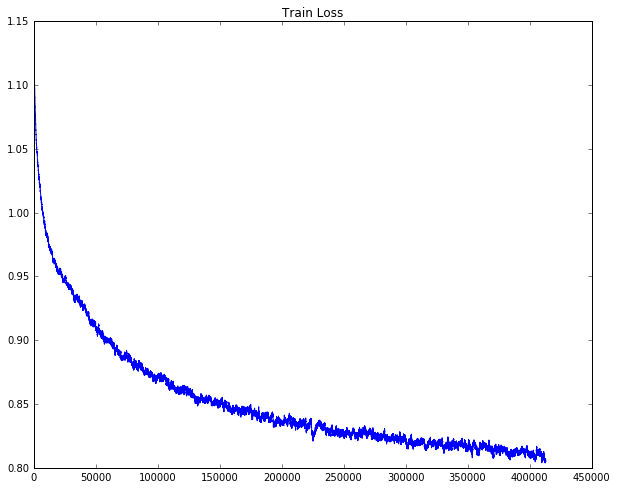

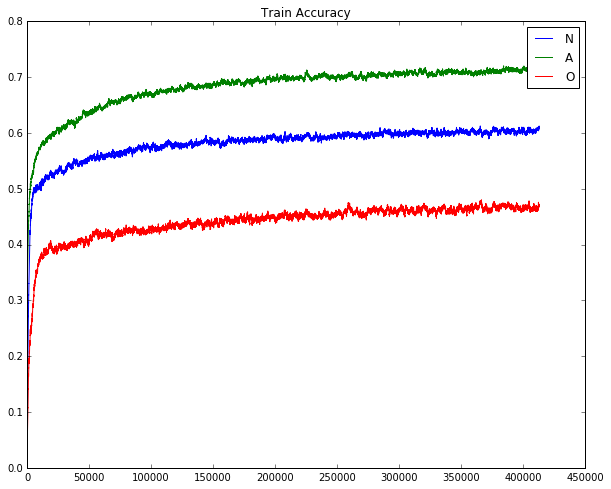

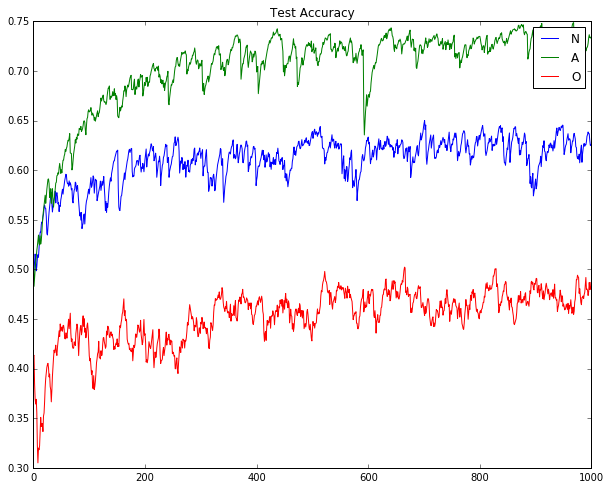

In [7]:
results[0][0].plot()

In [10]:
T.evaluate(results[0][0].net.cuda(), test_producer, 0)

  13, sample/sec: 19.57
 0.6498  0.7270  0.5472
[torch.FloatTensor of size 1x3]




 0.6498  0.7270  0.5472
[torch.FloatTensor of size 1x3]

In [ ]:
B1 = results[0][0].net.cuda()
B1(data['x'].cuda(), data['len'].cuda()).size()